#  Advanced Business Intelligence Analysis

Summary outputs loaded successfully.

Day 3 Overview:
  analysis_date  patients_analyzed  current_no_show_rate  model_auc_score  \
0    2025-10-30               3000              0.291333         0.602158   

   optimal_threshold  high_risk_patients_identified  targeting_accuracy  \
0                0.1                           3000            0.291333   

   monthly_net_savings  annual_savings_potential  return_on_investment  \
0              24330.0                  291960.0                 1.622   

  key_predictor  
0           Age  

Step 1: Business Performance Overview
Current no-show rate: 29.1%
Estimated monthly loss: $15,000


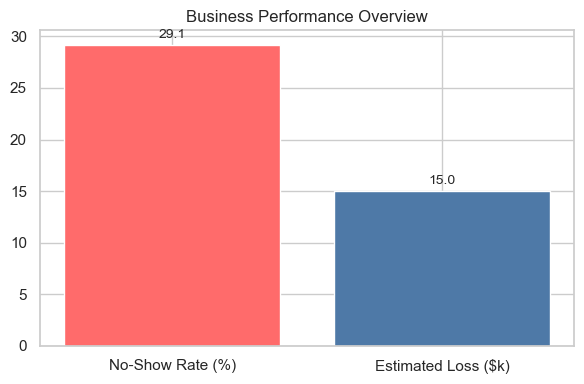


Step 2: ROI Simulation Across Intervention Strategies
   Success Rate  Gross Savings  Total Cost   Net Savings       ROI
0           0.1    8351.258581        9000   -648.741419 -0.072082
1           0.2   16702.517162        9000   7702.517162  0.855835
2           0.3   25053.775744        9000  16053.775744  1.783753
3           0.4   33405.034325        9000  24405.034325  2.711670


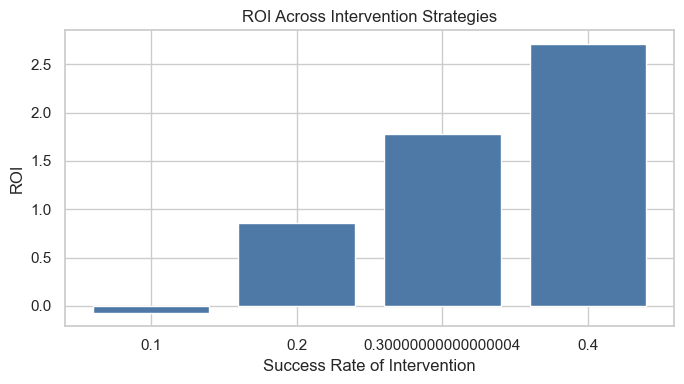


Step 3: Sensitivity Analysis on High-Risk Thresholds
   Threshold  High-Risk Patients  Expected Savings
0       0.05                1500           12165.0
1       0.10                3000           24330.0
2       0.15                4500           36495.0
3       0.20                6000           48660.0

Step 4: Annual Impact Projection
   Success Rate  Annual Net Savings
0           0.1        -7784.897025
1           0.2        92430.205950
2           0.3       192645.308924
3           0.4       292860.411899


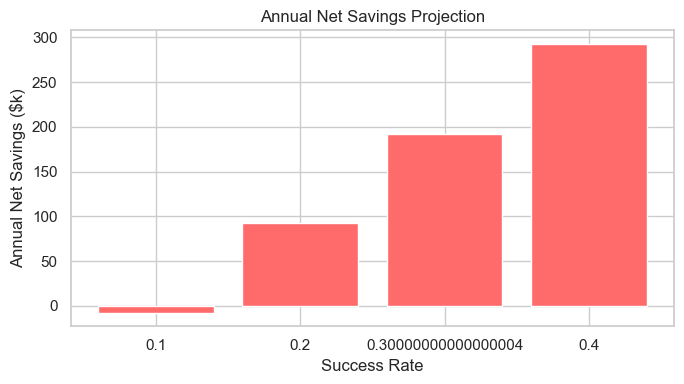


Analytics outputs saved in: ../analytics/


In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


# 0. Paths & Loading Data

base_path = "../outputs/"
summary_path = os.path.join(base_path, "executive_summary.csv")
high_risk_path = os.path.join(base_path, "high_priority_patients.csv")

summary_df = pd.read_csv(summary_path)
high_risk_df = pd.read_csv(high_risk_path)

print("Summary outputs loaded successfully.\n")
print("Day 3 Overview:")
print(summary_df.head())


# 1. Business Performance Overview

print("\nStep 1: Business Performance Overview")

no_show_rate = summary_df['current_no_show_rate'].values[0]
monthly_savings = summary_df['monthly_net_savings'].values[0]
estimated_monthly_loss = monthly_savings / summary_df['return_on_investment'].values[0]

print(f"Current no-show rate: {no_show_rate*100:.1f}%")
print(f"Estimated monthly loss: ${estimated_monthly_loss:,.0f}")

# Plotting (Matplotlib)
metrics = ["No-Show Rate (%)", "Estimated Loss ($k)"]
values = [no_show_rate*100, estimated_monthly_loss/1000]
colors = ["#FF6B6B", "#4E79A7"]

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(metrics, values, color=colors)

# Annotate values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}" if height < 100 else f"{height:,.0f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title("Business Performance Overview")
plt.tight_layout()
plt.show()

# 2. ROI Simulation Across Intervention Strategies

print("\nStep 2: ROI Simulation Across Intervention Strategies")

success_rates = np.arange(0.1, 0.5, 0.1)
intervention_cost = 9000

roi_data = []
for rate in success_rates:
    gross_savings = monthly_savings * rate / no_show_rate
    net_savings = gross_savings - intervention_cost
    roi = net_savings / intervention_cost
    roi_data.append([rate, gross_savings, intervention_cost, net_savings, roi])

roi_df = pd.DataFrame(roi_data, columns=["Success Rate", "Gross Savings", "Total Cost", "Net Savings", "ROI"])
print(roi_df)

# Plot ROI
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(roi_df["Success Rate"].astype(str), roi_df["ROI"], color="#4E79A7")
ax.set_xlabel("Success Rate of Intervention")
ax.set_ylabel("ROI")
ax.set_title("ROI Across Intervention Strategies")
plt.tight_layout()
plt.show()


# 3. Sensitivity Analysis 

print("\nStep 3: Sensitivity Analysis on High-Risk Thresholds")

thresholds = np.arange(0.05, 0.21, 0.05)
sensitivity_data = []
high_risk_patients = summary_df['high_risk_patients_identified'].values[0]

for t in thresholds:
    targeted_patients = int(high_risk_patients * t/0.1)  # scale proportionally
    savings = monthly_savings * (t/0.1)
    sensitivity_data.append([t, targeted_patients, savings])

sensitivity_df = pd.DataFrame(sensitivity_data, columns=["Threshold", "High-Risk Patients", "Expected Savings"])
print(sensitivity_df)

# 4. Annual Impact Projection

print("\nStep 4: Annual Impact Projection")

annual_df = roi_df.copy()
annual_df['Annual Net Savings'] = annual_df['Net Savings'] * 12

print(annual_df[["Success Rate", "Annual Net Savings"]])

# Plot Annual Net Savings
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(annual_df["Success Rate"].astype(str), annual_df["Annual Net Savings"]/1000, color="#FF6B6B")
ax.set_xlabel("Success Rate")
ax.set_ylabel("Annual Net Savings ($k)")
ax.set_title("Annual Net Savings Projection")
plt.tight_layout()
plt.show()

# 5. Save Analytics Outputs
analytics_path = "../analytics/"
os.makedirs(analytics_path, exist_ok=True)

roi_df.to_csv(os.path.join(analytics_path, "roi_simulation.csv"), index=False)
sensitivity_df.to_csv(os.path.join(analytics_path, "sensitivity_analysis.csv"), index=False)
annual_df.to_csv(os.path.join(analytics_path, "annual_impact.csv"), index=False)

print("\nAnalytics outputs saved in:", analytics_path)
